In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/privacy/")
from privacy.encode import encodeData, encodeNonAnonData
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/")

In [2]:
data = "texas"
method = "classic_mondrian"

In [9]:
class Synthetic_Utility:
    def __init__(self, data, method, epoch_list):
        self.data = data
        self.method = method
        self.epoch_list = epoch_list
    
    def get_features(self):
        self.features = []
        self.val = []
        for epoch in self.epoch_list:
            syn_path = f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/synthetic_results/{self.data}_syn_{epoch}.csv'
            pr_data_anon, X_anon, y_anon = encodeNonAnonData(self.data, syn_path, is_syn=True)
            self.features.append((X_anon, y_anon))
            pr_data_anon.to_csv(f"./pr_synthetic_results/{self.data}_synthetic_{epoch}.csv", index=False)
        _, X_val, y_val = encodeNonAnonData(self.data, f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{self.data}/val.csv')
        self.val_data = X_val, y_val

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            if self.data == "texas":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1)])
            elif self.data == "adult":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')])
            else:
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(10, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')])
            self.models.append(model)

    def compile_models(self):
        for i in range(len(self.models)):
            if self.data == "adult":
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='binary_crossentropy',
                    metrics=["accuracy"])
            elif self.data == "texas":
                self.models[i].compile(optimizer='adam',
                    loss='mean_squared_error')
            else:
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='categorical_crossentropy',
                    metrics=["accuracy"])

    def prepare_training(self):
        self.get_features()
        self.get_model()
        self.compile_models()
    
    def train(self):
        self.histories = []
        for i in range(len(self.epoch_list)):
            X, y = self.features[i]
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
            history = self.models[i].fit(X, y, epochs=100, batch_size=64, validation_data=self.val_data, callbacks=[callback])
            self.histories.append(history)
            self.models[i].save(f"./syn_weights/model_{self.data}_{self.epoch_list[i]}.h5")
            print(f"{i+1} trained.")

    def plot_results(self):
        for i in range(len(self.histories)):
            if i == 0:
                plt.plot(self.histories[i].history['accuracy'], label="Original")
            else:
                plt.plot(self.histories[i].history['accuracy'], label=f"K = {self.k_list[i-1]}")
        plt.title("Train Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
            

In [10]:
syn_util = Synthetic_Utility(data, method, [31])

In [11]:
syn_util.prepare_training()

Replacing all generalized values...


75555it [00:02, 27073.35it/s]


Replacing all generalized values...


75555it [00:02, 27872.30it/s]


In [12]:
syn_util.train()

Epoch 1/100


2023-11-29 17:45:55.367392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 1.0032

2023-11-29 17:46:05.421184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 14s 12ms/step - loss: 1.0032 - val_loss: 1.0054
Epoch 2/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0007 - val_loss: 1.0019
Epoch 3/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0007 - val_loss: 1.0003
Epoch 4/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0004 - val_loss: 1.0005
Epoch 5/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0003 - val_loss: 0.9997
Epoch 6/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0002 - val_loss: 1.0005
Epoch 7/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 8/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0002 - val_loss: 1.0000
Epoch 9/100
1181/1181 [==============================] - 13s 11ms/step - loss: 1.0002 - val_loss: 1.0010
Epoch 10/100
1181/1181 [==============================] - 13s 11ms/

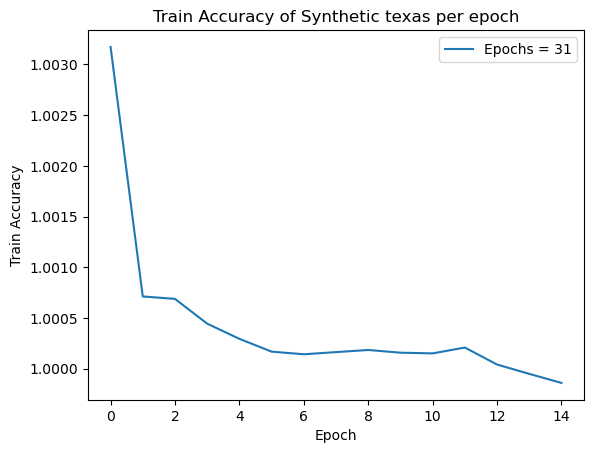

In [16]:
for i in range(len(syn_util.histories)):
    plt.plot(syn_util.histories[i].history['loss'], label=f"Epochs = {syn_util.epoch_list[i]}")
plt.xlabel("Epoch")
plt.ylabel(f"Train Accuracy")
plt.title(f"Train Accuracy of Synthetic {data} per epoch")
plt.legend()
plt.show()

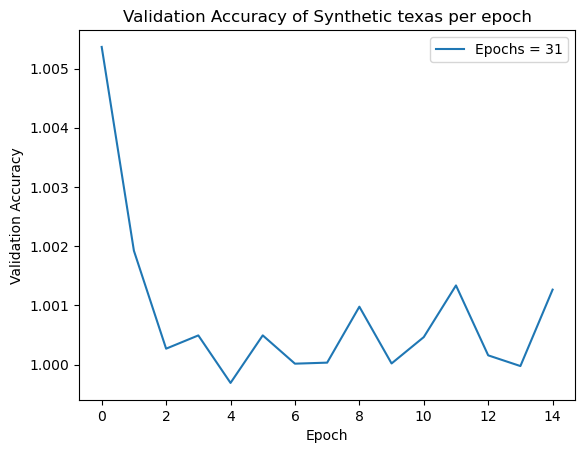

In [17]:
for i in range(len(syn_util.histories)):
    plt.plot(syn_util.histories[i].history['val_loss'], label=f"Epochs = {syn_util.epoch_list[i]}")
plt.xlabel("Epoch")
plt.ylabel(f"Validation Accuracy")
plt.title(f"Validation Accuracy of Synthetic {data} per epoch")
plt.legend()
plt.show()